# Importing Libraries

In [5]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [6]:
%run "Stock Data.ipynb".ipynb
%run "Binance API.ipynb".ipynb
%run "RiskMetrics.ipynb".ipynb
%run "PnL Computation.ipynb".ipynb

# Importing Data

## Tickers

In [9]:
binance_api_key='E90xR7UnO2oeP3lrgC50zkqUuAqyyXs4uSlAGcqIVO9n90ELrFI4gfVI2HGGxxCj'
binance_api_secret='Inls2xYl9FqPi0zlIrucfxG81drx7w6Pv6SzYFxMNoAcwDjlCKug7zUM9zB3lF9h'
Binance=BinanceAPI(binance_api_key,binance_api_secret)

In [10]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [12]:
start_date=datetime.datetime(2023,12,1)
enddate=start_date+datetime.timedelta(500)

In [13]:
quantities_api=Binance.binance_api.user_asset()
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [14]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [15]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
price=get_trade_in_usdt(trade_history)

In [16]:
book_cost=get_book_cost(price)
realized_pnl,profit_and_loss=get_pnl(book_cost,price)
historical_positions=get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

In [17]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()

In [18]:
dic={}
for key in profit_and_loss:
    dic[key]=profit_and_loss[key].to_dict()

In [19]:
realized_pnl_time=pd.DataFrame(dic).sort_index().ffill().fillna(0)
realized_pnl_time.index=pd.to_datetime(realized_pnl_time.index).round(freq='d')
realized_pnl_time=realized_pnl_time.groupby(realized_pnl_time.index).sum()

In [20]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:75].to_list()
holding=Binance.get_inventory()
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.sort_values(ascending=False,by='Price in USDT')

,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL
Total,2184.935036,3790.938676,1.0000,-131.886217,1606.00,1474.113783
OMUSDT,526.319895,1759.672729,0.4642,0.000000,1233.35,1233.350000
BTCUSDT,601.021649,840.689922,0.2218,3.537078,239.67,243.207078
JASMYUSDT,387.458505,433.039726,0.1142,0.000000,45.58,45.580000
SOLUSDT,281.200518,348.903647,0.0920,0.000000,67.70,67.700000
ETHUSDT,250.747339,233.624671,0.0616,0.000000,-17.12,-17.120000
TRXUSDT,76.868953,124.210879,0.0328,-10.723889,47.34,36.616111
BBUSDT,60.176053,49.591595,0.0131,-39.733101,-10.58,-50.313101
BNBUSDT,1.142121,1.205502,0.0003,-10.606040,0.06,-10.546040
PEPEUSDT,0.000004,0.000005,0.0000,-38.521986,0.00,-38.521986


In [21]:
data1=Binance.get_price(tickers,start_date)
data2=Binance.get_price(tickers,enddate)
data=data1.combine_first(data2)
data.index=pd.to_datetime(data.index)
#data=data.dropna(axis=1)
n=len(data.columns)
data=data.sort_index()

In [22]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [23]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [24]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [26]:
position=pd.read_excel('Positions.xlsx',index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')

positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [27]:
quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx')

quantities_tickers=list(quantities.columns)

In [28]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])

In [29]:
price_pnl.index=pd.to_datetime(price_pnl.index)
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()
for col in quantities:
    
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost.iloc[-1][col])

pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum()[0]

C:\Users\niroo\AppData\Local\Temp\ipykernel_154732\1175112299.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum()[0]


In [30]:
pnl_history['Total']-pnl_history['Total'].shift(1)

2024-09-23           NaN
2024-09-24     23.503339
2024-09-25     -7.470131
2024-09-26     85.699217
2024-09-27     16.519121
                 ...    
2024-12-27    -11.497336
2024-12-28     52.544278
2024-12-29    -78.529904
2024-12-30   -113.891409
2024-12-31    170.019746
Name: Total, Length: 100, dtype: float64

In [31]:
pnl_history['Total']

2024-09-23    -378.365173
2024-09-24    -354.861834
2024-09-25    -362.331965
2024-09-26    -276.632747
2024-09-27    -260.113627
                 ...     
2024-12-27    1416.297049
2024-12-28    1468.841327
2024-12-29    1390.311423
2024-12-30    1276.420014
2024-12-31    1446.439761
Name: Total, Length: 100, dtype: float64

In [32]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [33]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [34]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [35]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change())


LDUMAUSDT not retrieved
Total not retrieved


C:\Users\niroo\AppData\Local\Temp\ipykernel_154732\974280261.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  binance_data=np.log(1+binance_data.pct_change())


In [36]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [37]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [38]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

<Axes: >

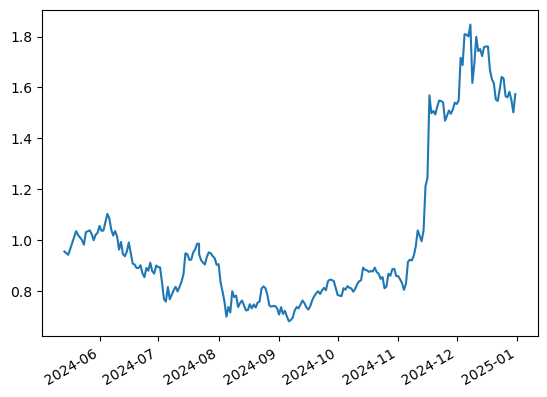

In [39]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()

## Ex ante data

In [41]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [44]:
historical_risk=RiskAnalysis(returns_to_use)
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [45]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [48]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash[0]]-0.00},
                                                                              
                                                                              {'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
OMUSDT,0.4067
BNBUSDT,0.2193
PEPEUSDT,0.1156
SUIUSDT,0.1006
XRPUSDT,0.0523
XLMUSDT,0.0522
TRXUSDT,0.0461
AAVEUSDT,0.0072
BONKUSDT,0.0000
APTUSDT,0.0000


In [49]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.30}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory

,Optimal Weights
OMUSDT,0.389837
BTCUSDT,0.300000
SUIUSDT,0.080670
PEPEUSDT,0.080431
BNBUSDT,0.071974
XLMUSDT,0.041767
TRXUSDT,0.033293
XRPUSDT,0.002029


### Current results

In [51]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

In [52]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio")#,constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit[0]]-0.40}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
OMUSDT,0.415242
BTCUSDT,0.398242
TRXUSDT,0.186516


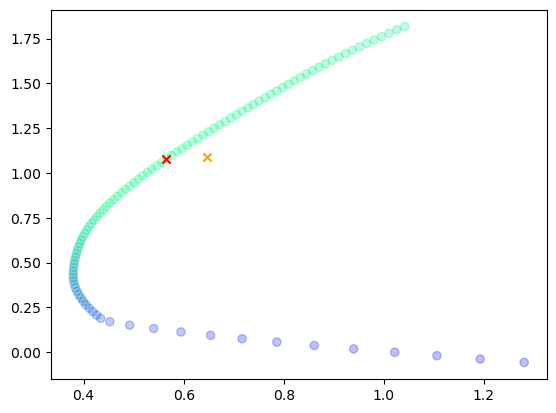

In [53]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')

## Real Portfolio vs Optimal

In [55]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison['Weights']=current_holding_comparison['Weights'].round(7)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,1759.672729,0.464179,0.415242,0.048937
BTCUSDT,840.689922,0.221763,0.398242,-0.176479
JASMYUSDT,433.039726,0.114230,0.000000,0.000000
SOLUSDT,348.903647,0.092036,0.000000,0.000000
ETHUSDT,233.624671,0.061627,0.000000,0.000000
TRXUSDT,124.210879,0.032765,0.186516,-0.153751
BBUSDT,49.591595,0.013082,0.000000,0.000000
BNBUSDT,1.205502,0.000318,0.000000,0.000000
PEPEUSDT,0.000005,0.000000,0.000000,0.000000


In [56]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,inventory],axis=1)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison['Weights']=historical_comparison['Weights'].round(7)
historical_comparison=historical_comparison.fillna(0)
historical_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,1759.672729,0.464179,0.389837,0.074342
BTCUSDT,840.689922,0.221763,0.300000,-0.078237
JASMYUSDT,433.039726,0.114230,0.000000,0.000000
SOLUSDT,348.903647,0.092036,0.000000,0.000000
ETHUSDT,233.624671,0.061627,0.000000,0.000000
TRXUSDT,124.210879,0.032765,0.033293,-0.000528
BBUSDT,49.591595,0.013082,0.000000,0.000000
BNBUSDT,1.205502,0.000318,0.071974,-0.071656
PEPEUSDT,0.000005,0.000000,0.080431,-0.080431
SUIUSDT,0.000000,0.000000,0.080670,0.000000


# Risk Reward Analysis

In [58]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [59]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

<Axes: >

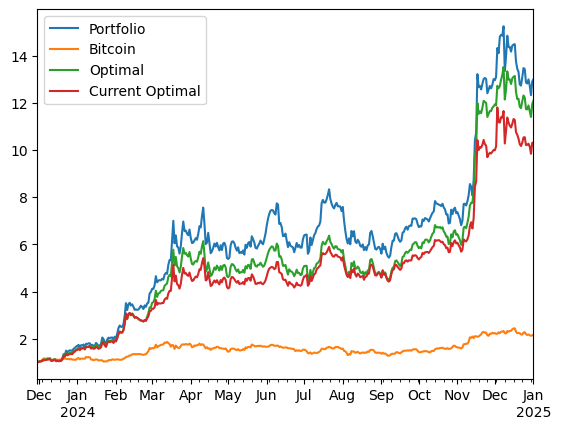

In [60]:
(1+portfolio_perf.loc[:]).cumprod().plot()

In [61]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

<Axes: >

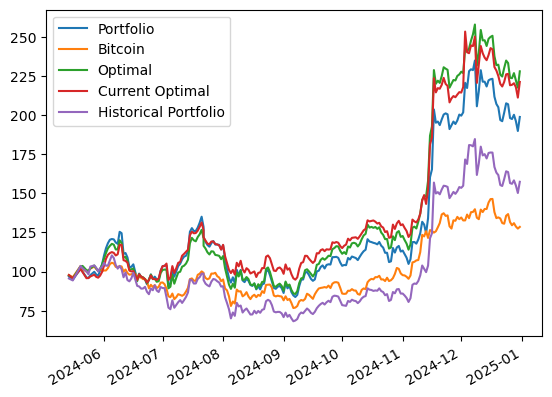

In [62]:
((1+current_perf).cumprod()*100).plot()

In [63]:
((1+current_perf).cumprod()*100).iloc[-10:]

,Portfolio,Bitcoin,Optimal,Current Optimal,Historical Portfolio
2024-12-22,196.134425,131.022237,224.673047,218.311253,154.715129
2024-12-23,201.581599,130.602012,230.130209,221.240814,159.135218
2024-12-24,207.571753,135.706912,234.891801,226.081111,164.109079
2024-12-25,206.941221,136.756466,233.301727,226.361720,163.594790
2024-12-26,198.144894,131.658888,223.899879,219.105342,156.561732
2024-12-27,197.510635,129.591304,223.629677,219.379576,156.109214
2024-12-28,200.227481,130.959647,226.857231,220.410709,158.313612
2024-12-29,196.135781,128.795667,222.191823,217.853365,155.021297
2024-12-30,189.882649,127.489058,217.554761,211.218190,150.230127
2024-12-31,198.828217,128.561620,228.007050,221.227739,157.391828


## Volatilities

In [65]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.641104
 dtype: float64,
 0.6418861861890349)

In [66]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.646061
 dtype: float64,
 0.6460609521703474)

In [67]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.725810
Bitcoin            0.432023
Optimal            0.641886
Current Optimal    0.633638
dtype: float64

In [68]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.4539877206869214

## Risk Contribution

In [70]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,0.115356,0.071974,0.008824,0.025597,0.002867,0.022730
BTCUSDT,0.352177,0.300000,0.030720,0.131079,0.040770,0.090309
OMUSDT,19.109473,0.389837,0.918487,0.685081,0.583713,0.101368
PEPEUSDT,0.360196,0.080431,0.020755,0.078515,0.024827,0.053688
SUIUSDT,0.207754,0.080670,0.013586,0.052600,0.014399,0.038201
TRXUSDT,0.027030,0.033293,0.002841,0.009127,0.001257,0.007870
XLMUSDT,0.054322,0.041767,0.004526,0.017131,0.002688,0.014443
XRPUSDT,0.003496,0.002029,0.000260,0.000870,0.000004,0.000866


In [71]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,0.993554,0.415242,0.625549,0.701808,0.587505,0.114302
BTCUSDT,0.158585,0.398242,0.247248,0.164744,0.083275,0.081469
TRXUSDT,0.099958,0.186516,0.127203,0.133448,0.080559,0.052889


In [72]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,1.123109,0.469388,0.710370,0.692589,0.572776,0.119814
BTCUSDT,0.089394,0.224490,0.140015,0.087559,0.020189,0.067370
JASMYUSDT,0.010031,0.112245,0.054544,0.107883,0.035962,0.071921
SOLUSDT,0.008487,0.091837,0.044752,0.062306,0.008358,0.053948
ETHUSDT,-0.000042,0.061224,0.027292,0.027621,0.002641,0.024980
TRXUSDT,0.016406,0.030612,0.020973,0.011801,0.001656,0.010146
BBUSDT,-0.005601,0.010204,0.002054,0.010241,0.000409,0.009832


# Value At Risk

## Historical

### Optimal Weights

In [76]:
var,cvar=historical_risk.historical_var(opt_weights)
(var,cvar)

(-0.050633358136264926, -0.0754088511554361)

### Current Weights

In [78]:
var,cvar=current_risk.historical_var(current_weights)
(var,cvar)

(-0.047923225255875966, -0.07310092645985905)

In [79]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.05
row=round(historical_var.shape[0]*centile)

In [80]:
var=historical_var.iloc[row]
var

OMUSDT      -0.018264
BTCUSDT     -0.011503
JASMYUSDT   -0.009116
SOLUSDT     -0.007001
ETHUSDT      0.000963
TRXUSDT     -0.001908
BBUSDT      -0.000127
BNBUSDT     -0.000000
PEPEUSDT    -0.000000
Portfolio   -0.046956
Name: 2024-11-25 00:00:00, dtype: float64

In [81]:
cvar=historical_var.iloc[:row+1].mean()
cvar

OMUSDT      -0.041792
BTCUSDT     -0.008142
JASMYUSDT   -0.010282
SOLUSDT     -0.006310
ETHUSDT     -0.002621
TRXUSDT     -0.001064
BBUSDT      -0.000878
BNBUSDT      0.000000
PEPEUSDT     0.000000
Portfolio   -0.071090
dtype: float64

## Parametric

### Optimal Weights

In [84]:
var,cvar=historical_risk.parametric_var(opt_weights)

(var,cvar)

(-0.06650970413253797, -0.08524705178315915)

### Current Weights

In [86]:
var,cvar=current_risk.parametric_var(current_weights)

(var,cvar)

(-0.06694227684747393, -0.0858014904039752)

## Multivariate

### Optimal Weights

In [89]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.058886395118096804, -0.07645177728334204)

### Current Weights

In [91]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06130369743199661, -0.07813980218320196)

In [92]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]

    scenario_multivariate[i]=results.to_dict()

mean_scenario_multivariate=pd.DataFrame(scenario_multivariate).T.mean()
mean_scenario_multivariate

OMUSDT      -0.040354
BTCUSDT     -0.005972
JASMYUSDT   -0.007897
SOLUSDT     -0.004475
ETHUSDT     -0.002311
TRXUSDT     -0.000471
BBUSDT      -0.000951
Portfolio   -0.062431
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [96]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06066220344202392, -0.07785493374030403)

### Current Weights

In [98]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.062260120846940166, -0.07882103673331521)

In [99]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]
    
    scenario_gaussian[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gaussian).T.mean()
mean_scenario_gaussian

OMUSDT      -0.042808
BTCUSDT     -0.005257
JASMYUSDT   -0.007387
SOLUSDT     -0.004134
ETHUSDT     -0.001632
TRXUSDT     -0.000762
BBUSDT      -0.000649
Portfolio   -0.062630
dtype: float64

## Student Copula

### Optimal Weights

In [102]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.05865619509419785, -0.07568073687971509)

### Current Weights

In [104]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06340557391905464, -0.0809277352888732)

In [105]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]
    
    scenario_t_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_t_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.045568
BTCUSDT     -0.004816
JASMYUSDT   -0.006296
SOLUSDT     -0.004191
ETHUSDT     -0.001784
TRXUSDT     -0.000702
BBUSDT      -0.000641
Portfolio   -0.063998
dtype: float64

## Gumbel Copula

### Optimal Weights

In [108]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.10872162626684848, -0.1589043731122773)

### Current Weights

In [110]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.11317732208250879, -0.1633318247765357)

In [111]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gumbel_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.109629
BTCUSDT      0.000851
JASMYUSDT   -0.002698
SOLUSDT     -0.000534
ETHUSDT     -0.000054
TRXUSDT     -0.000251
BBUSDT      -0.000070
Portfolio   -0.112386
dtype: float64

## Monte Carlo

### Optimal

In [114]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [115]:
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06893150124007623, -0.0853322151979749)

### Current Weights

In [117]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06741205625770742, -0.0841548239322608)

In [118]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results
    
mean_scenario_monte_carlo=pd.DataFrame(scenario_monte_carlo).T.mean()
mean_scenario_monte_carlo

OMUSDT      -0.048841
BTCUSDT     -0.005432
JASMYUSDT   -0.007096
SOLUSDT     -0.004083
ETHUSDT     -0.001688
TRXUSDT     -0.000736
BBUSDT      -0.000738
Portfolio   -0.068614
dtype: float64

## VaR Violation

In [120]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2024-01-14,-0.055547,-0.094501,-0.078658,-0.024771
2024-01-15,-0.055547,-0.094550,-0.077952,0.022355
2024-01-16,-0.055547,-0.094032,-0.078281,0.042729
2024-01-17,-0.055547,-0.095928,-0.082692,-0.028292
2024-01-18,-0.055547,-0.098669,-0.082709,-0.038087
...,...,...,...,...
2024-12-28,-0.087402,-0.074961,-0.072965,0.014433
2024-12-29,-0.087402,-0.075332,-0.077584,-0.020565
2024-12-30,-0.087402,-0.075826,-0.075780,-0.020870
2024-12-31,-0.087402,-0.078552,-0.078672,0.048044


In [121]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2024-05-28,-0.035704,-0.084291,-0.080093,-0.016902
2024-05-29,-0.035704,-0.081713,-0.076246,-0.008760
2024-05-30,-0.035704,-0.071542,-0.067843,0.035167
2024-05-31,-0.035704,-0.072670,-0.066637,0.038901
2024-06-01,-0.035704,-0.076392,-0.068132,0.053894
...,...,...,...,...
2024-12-28,-0.050004,-0.056973,-0.061767,0.013755
2024-12-29,-0.050004,-0.057443,-0.063666,-0.020435
2024-12-30,-0.050004,-0.056911,-0.066837,-0.031882
2024-12-31,-0.050004,-0.066251,-0.073095,0.047111


<Axes: >

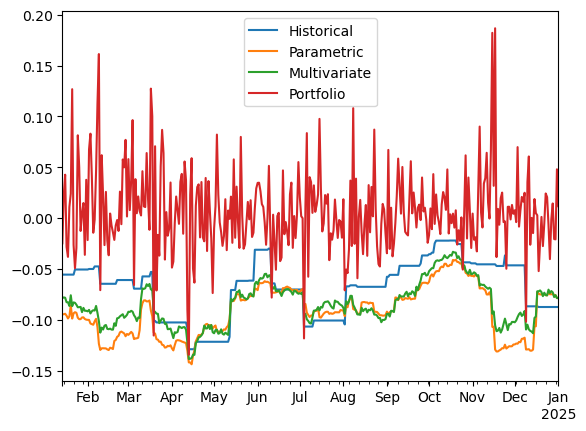

In [122]:
var_data.plot()

<Axes: >

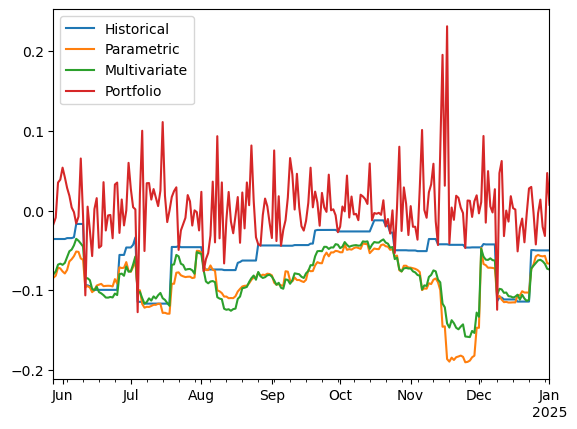

In [123]:
current_var_data.plot()

In [124]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.025424,0.011299,0.011299
Kupiec Stat,5.44903,16.052513,16.052513
P-value,0.019579,0.000062,0.000062


In [125]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.063927,0.018265,0.018265
Kupiec Stat,0.825033,6.073264,6.073264
P-value,0.363713,0.013724,0.013724


# Principal Component Analysis

## Historical PCA

In [128]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.77123742, 0.07407986, 0.0585441 , 0.05220832, 0.0439303 ])

In [129]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

AAVEUSDT    0.015865
ADAUSDT     0.016003
ALGOUSDT    0.018142
APTUSDT     0.016666
ARBUSDT     0.017646
              ...   
WBTCUSDT    0.009431
WLDUSDT     0.022646
XLMUSDT     0.013081
XRPUSDT     0.011215
XTZUSDT     0.016710
Name: PC1, Length: 61, dtype: float64

<Axes: >

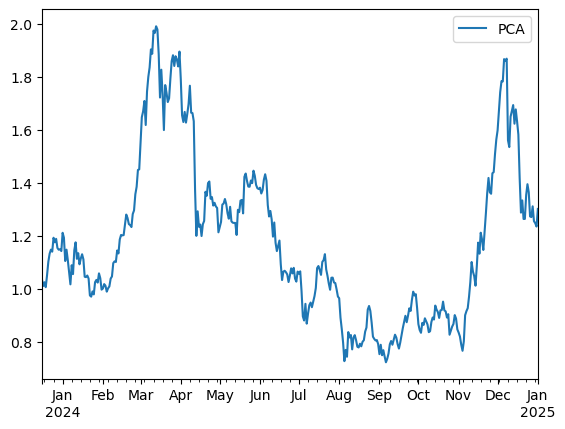

In [130]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()

<Axes: >

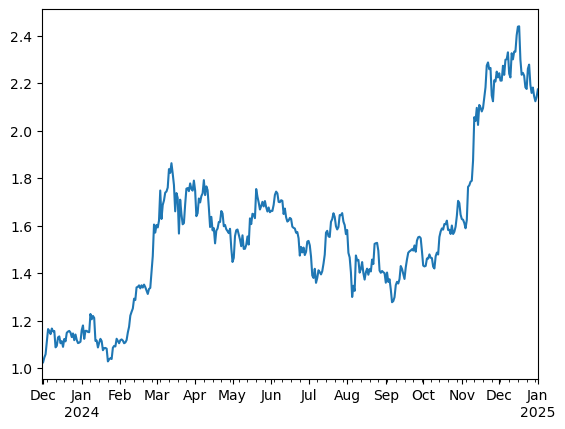

In [131]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()

In [132]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
WBETHUSDT    0.428439
ETHUSDT      0.428601
ATOMUSDT     0.450219
ETCUSDT      0.452809
               ...   
WLDUSDT      1.138381
BONKUSDT     1.141908
FTTUSDT      1.178765
PEPEUSDT     1.193684
OMUSDT       1.549460
Length: 62, dtype: float64

<Axes: >

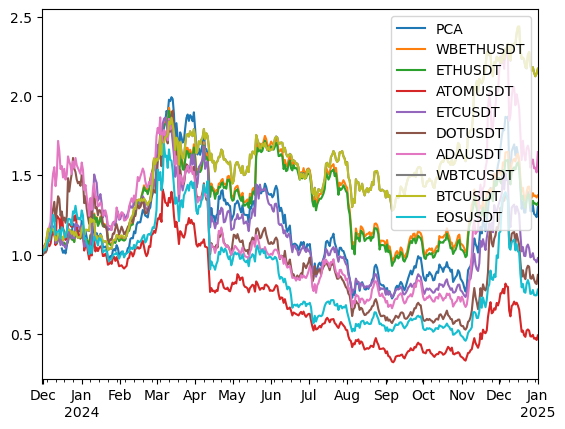

In [133]:
(1+comparison[distances.index[:10]]).cumprod().plot()

<Axes: >

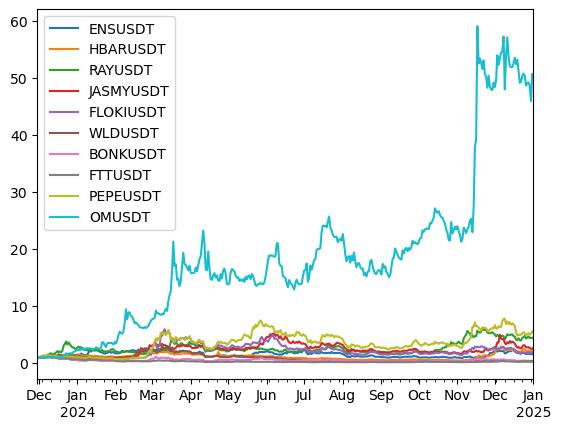

In [134]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [136]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.54421638, 0.14892515, 0.13096365, 0.10155808, 0.07433674])

In [137]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

OMUSDT       0.095388
BTCUSDT      0.060972
JASMYUSDT    0.170206
SOLUSDT      0.101831
ETHUSDT      0.083240
TRXUSDT      0.050387
BBUSDT       0.214259
BNBUSDT      0.067714
PEPEUSDT     0.156003
Name: PC1, dtype: float64

<Axes: >

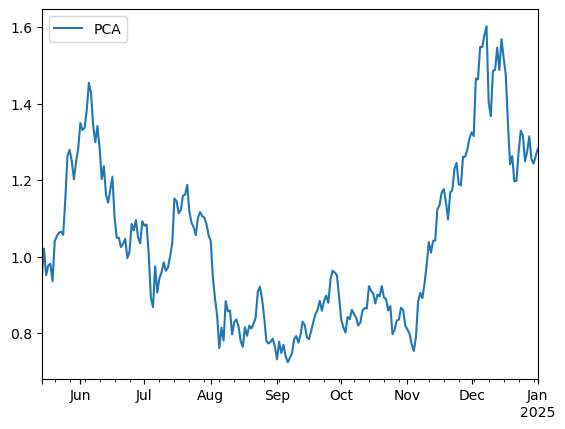

In [138]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA).cumprod().plot()

<Axes: >

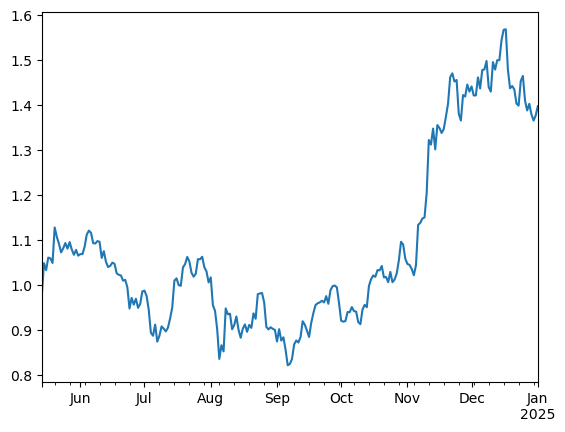

In [139]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()

In [140]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
SOLUSDT      0.401778
ETHUSDT      0.416055
BNBUSDT      0.428880
BTCUSDT      0.448724
JASMYUSDT    0.656248
PEPEUSDT     0.723913
BBUSDT       0.746147
TRXUSDT      0.892038
OMUSDT       0.909837
dtype: float64

<Axes: >

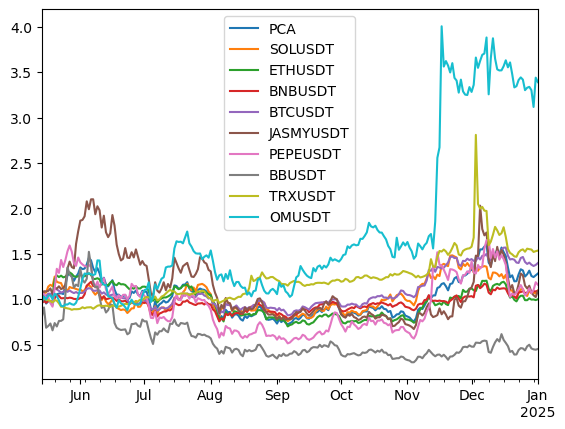

In [141]:
(1+comparison[distances.index[:10]]).cumprod().plot()

## Sensitivity Analysis

In [143]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT     1.895000
BBUSDT       1.553827
JASMYUSDT    1.279480
SOLUSDT      1.147612
BTCUSDT      1.000000
ETHUSDT      0.959267
OMUSDT       0.878653
BNBUSDT      0.662432
TRXUSDT      0.282335
Name: BTCUSDT, dtype: float64

In [144]:
days=15
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

JASMYUSDT    2.360187
PEPEUSDT     1.923262
BBUSDT       1.423569
SOLUSDT      1.336851
ETHUSDT      1.060764
BTCUSDT      1.000000
TRXUSDT      0.754063
BNBUSDT      0.725235
OMUSDT       0.406079
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [146]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [147]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
ETHUSDT,0.922137
SOLUSDT,0.322380
BBUSDT,0.119175
OMUSDT,0.071936
TRXUSDT,0.042425
JASMYUSDT,0.034578
PEPEUSDT,0.008110
BNBUSDT,-0.045214
BTCUSDT,-0.122087


### Regression to PCA

In [149]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-15:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

1.2284615453650765

In [150]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.265000
BNBUSDT      1.128645
ETHUSDT      1.001698
PCA          1.000000
SOLUSDT      0.814627
JASMYUSDT    0.424737
PEPEUSDT     0.384300
BBUSDT       0.358765
OMUSDT       0.232870
TRXUSDT      0.200071
dtype: float64

In [151]:
reg=ex_ante_perf.copy().dropna().iloc[-15:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.637870
ETHUSDT      1.545035
TRXUSDT      1.497163
BNBUSDT      1.453867
SOLUSDT      1.116965
PCA          1.000000
JASMYUSDT    0.722564
PEPEUSDT     0.624577
BBUSDT       0.615538
OMUSDT       0.219305
dtype: float64

### Correlation Matrix

<Axes: >

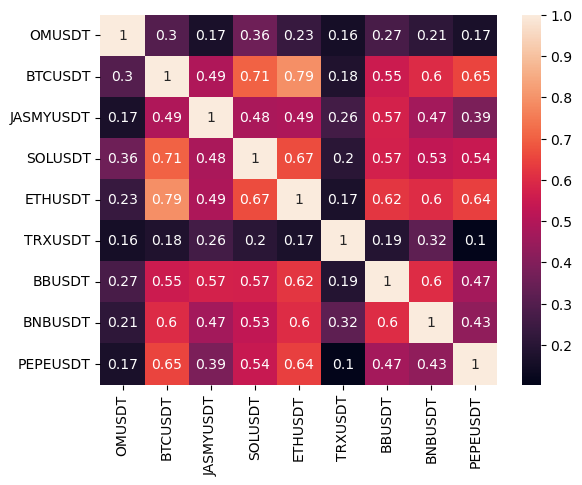

In [153]:
sns.heatmap(ex_ante_perf.corr(),annot=True)

<Axes: >

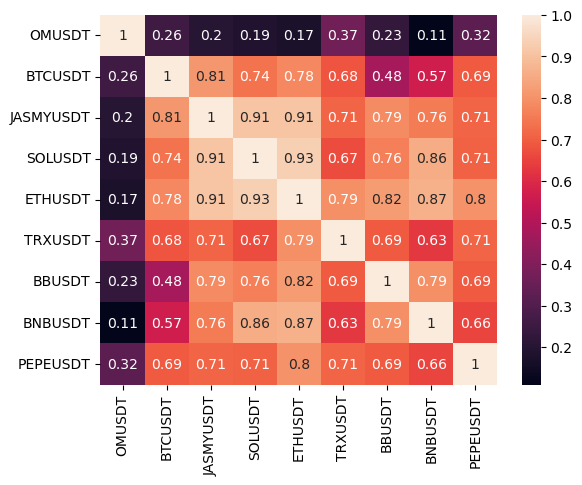

In [154]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

## Sliding window optimization

In [156]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,OMUSDT,BTCUSDT,JASMYUSDT,SOLUSDT,ETHUSDT,TRXUSDT,BBUSDT,BNBUSDT,PEPEUSDT
2024-05-27,0.000000,0.000000,0.621968,0.000000,0.000000,0.000000,0.000000,0.000000,0.378032
2024-06-10,0.625939,0.000000,0.150852,0.000000,0.000000,0.223209,0.000000,0.000000,0.000000
2024-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-07-08,0.182528,0.000000,0.000000,0.000000,0.000000,0.817472,0.000000,0.000000,0.000000
2024-07-22,0.133242,0.414562,0.000000,0.112009,0.000000,0.340186,0.000000,0.000000,0.000000
2024-08-05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.926694,0.000000,0.073306,0.000000
2024-09-02,0.435138,0.000000,0.000000,0.000000,0.000000,0.564862,0.000000,0.000000,0.000000
2024-09-16,0.287440,0.000000,0.000000,0.000000,0.000000,0.000000,0.712560,0.000000,0.000000
2024-09-30,0.176666,0.000000,0.000000,0.000000,0.165949,0.527049,0.000000,0.000000,0.130336


In [157]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0]

for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBETHUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT,XTZUSDT
2024-05-26,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.002619,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-06-25,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.966921,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-07-25,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.675200,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.109886,0.0
2024-08-24,0.910821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.073806,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-09-23,0.182769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-10-23,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.456324,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-11-22,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.184565,0.213077,0.0
2024-12-22,0.788217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.086025,0.0
2025-01-01,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
